## Load Data

In [1]:
path='PRDECT-ID.csv'

In [2]:
import pandas as pd
df = pd.read_csv(path,  encoding='ISO-8859-1')

In [3]:
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


In [4]:
df = pd.DataFrame(dict(text=df['Customer Review'], label = df['Sentiment']))
df.head()

,text,label
0,Alhamdulillah berfungsi dengan baik. Packaging...,Positive
1,"barang bagus dan respon cepat, harga bersaing ...",Positive
2,"barang bagus, berfungsi dengan baik, seler ram...",Positive
3,bagus sesuai harapan penjual nya juga ramah. t...,Positive
4,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive


In [5]:
print(df["label"].value_counts())

Negative    2821
Positive    2579
Name: label, dtype: int64


## Split Data

In [6]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)
print(df_train.shape)
print(df_test.shape)

(4320, 2)
(1080, 2)


## Tf-Idf + MultinomialNB

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

## Fit & Predict

In [8]:
# fit (x_train, y_train)
model.fit(df_train.text, df_train.label)
labels = model.predict(df_test.text)

## Result

1. Confusion Matrix

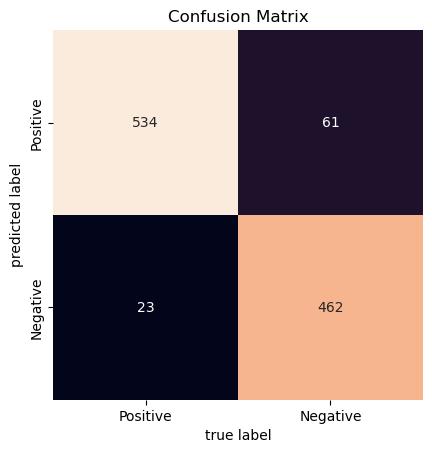

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(df_test.label, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=df_test.label.unique(), yticklabels=df_test.label.unique())
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix')
plt.show()

2. Classification Report & Accuracy

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
print('Classification Report\n')
print(classification_report(df_test.label, labels))
print('==========================================================')
print('Accuracy : ', accuracy_score(df_test.label, labels))

Classification Report

              precision    recall  f1-score   support

    Negative       0.90      0.96      0.93       557
    Positive       0.95      0.88      0.92       523

    accuracy                           0.92      1080
   macro avg       0.93      0.92      0.92      1080
weighted avg       0.92      0.92      0.92      1080

Accuracy :  0.9222222222222223


3. Word Cloud

In [15]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [19]:
from wordcloud import WordCloud
stopwords = ['yg', 'di', 'ke', 'yang', 'nya', 'dan']

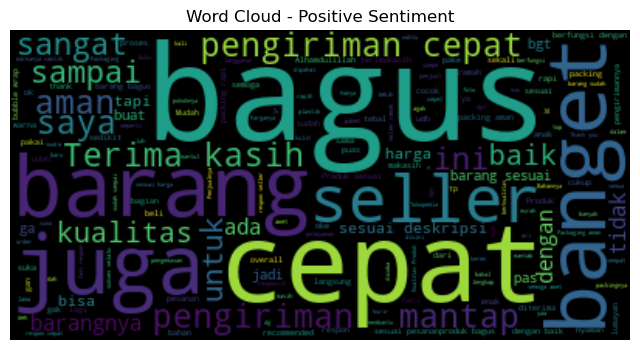

In [20]:
positive_reviews = df_test[df_test['label'] == 'Positive']['text']
text = ' '.join(positive_reviews)
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()

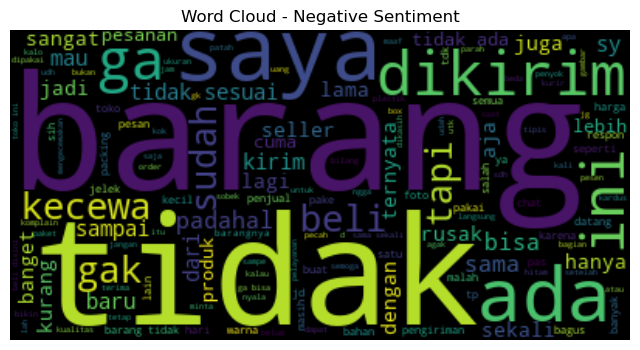

In [21]:
negative_reviews = df_test[df_test['label'] == 'Negative']['text']
text = ' '.join(negative_reviews)
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Sentiment')
plt.show()

## SAVE MODEL

In [22]:
# pickling the model
import pickle
pickle_out = open("pickle_model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()